# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [15]:
! pip install lazypredict

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [17]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-11-30 02:51:10--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-11-30 02:51:11--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [18]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [19]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [20]:
# Examine X dimension
X.shape

(4695, 881)

In [21]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [22]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [23]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3756, number of used features: 137
[LightGBM] [Info] Start training from score 5.814494


In [24]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,0.86,0.86,0.57,0.17
DecisionTreeRegressor,0.86,0.86,0.57,0.59
ExtraTreesRegressor,0.86,0.86,0.57,9.72
GaussianProcessRegressor,0.86,0.86,0.57,6.97
RandomForestRegressor,0.82,0.83,0.64,7.05
XGBRegressor,0.82,0.83,0.65,0.39
BaggingRegressor,0.80,0.81,0.67,1.81
MLPRegressor,0.76,0.77,0.75,9.42
HistGradientBoostingRegressor,0.67,0.69,0.87,1.60


In [25]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.46,0.54,1.06,1.11
RandomForestRegressor,0.44,0.52,1.08,5.82
LGBMRegressor,0.44,0.52,1.08,0.36
XGBRegressor,0.44,0.52,1.08,0.41
BaggingRegressor,0.41,0.49,1.11,0.64
NuSVR,0.39,0.48,1.12,2.06
SVR,0.39,0.48,1.12,1.84
KNeighborsRegressor,0.37,0.46,1.14,0.15
MLPRegressor,0.36,0.45,1.15,6.39


## **5. Data visualization of model performance**

[(0.0, 1.0)]

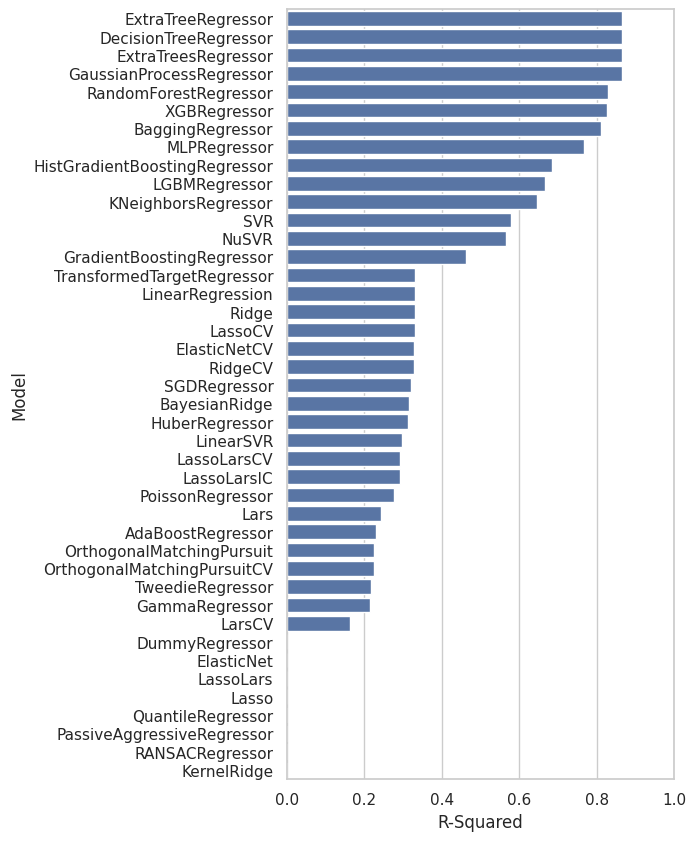

In [26]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

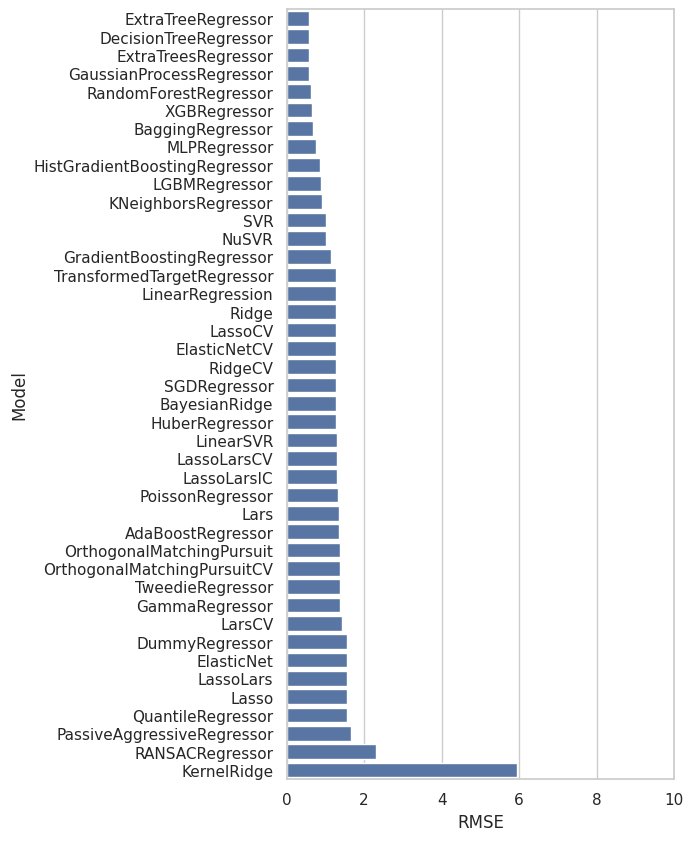

In [27]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

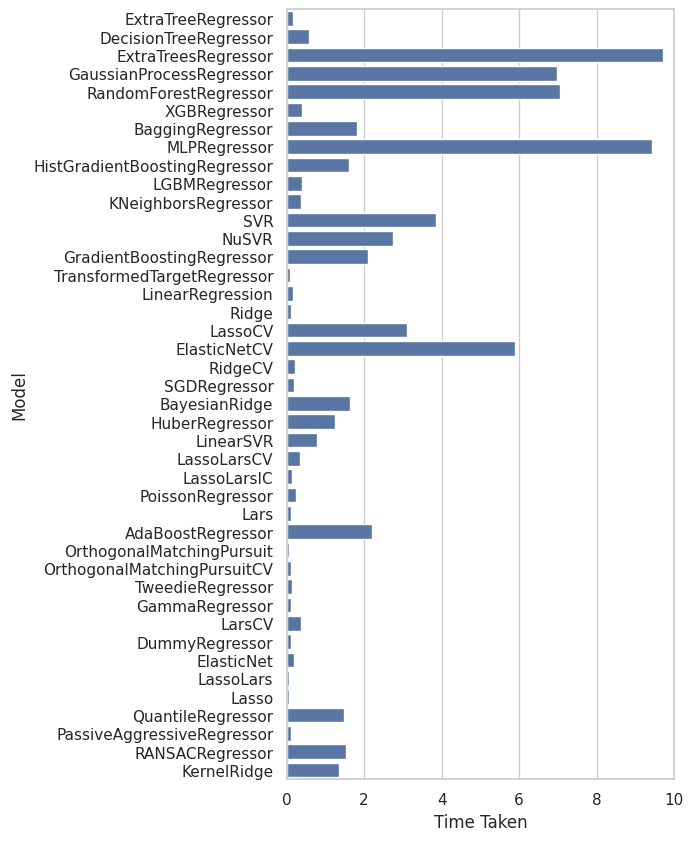

In [28]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))